In [13]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import os

In [145]:
tas_file = 'chess-met_tas_gb_1km_daily_20171201-20171231.nc'
ds = Dataset(tas_file, mode = 'r')

for dim in ds.dimensions.values():
    print(dim)
    
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 656
<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 1057
<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 31
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2
<class 'netCDF4._netCDF4.Variable'>
float64 lat(y, x)
    long_name: latitude
    standard_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (1057, 656)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lon(y, x)
    long_name: longitude
    standard_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (1057, 656)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: days since 1961-01-01 00:00:00 UTC
    axis: T
    calendar: gregorian
    standard_name: time
    long_name: time in days since 1961-01-01 00:00:00 UTC
    bounds: time_bnds
unlimited dimensions: 
c

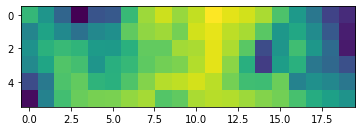

In [119]:
#chess values for shipston location: 426272, 241139
plt.imshow((tas[0][815:821, 415:435]))

In [37]:
path = '/home/ira/google-drive/Cambridge/Michaelmas 2020/flood_data/chess-met/'
wind_file = 'chess-met_sfcWind_gb_1km_daily_20171201-20171231.nc'
ds = Dataset(path+wind_file, mode = 'r')

In [38]:
for dim in ds.dimensions.values():
    print(dim)
    
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 656
<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 1057
<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 31
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2
<class 'netCDF4._netCDF4.Variable'>
float64 lat(y, x)
    long_name: latitude
    standard_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (1057, 656)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lon(y, x)
    long_name: longitude
    standard_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (1057, 656)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: days since 1961-01-01 00:00:00 UTC
    axis: T
    calendar: gregorian
    standard_name: time
    long_name: time in days since 1961-01-01 00:00:00 UTC
    bounds: time_bnds
unlimited dimensions: 
c

In [22]:
time = ds['time'][:]
lons = ds['x'][:]
#indexing as the data comes south-north, flipped to be north to south for sanity when plotting
lats = ds['y'][:][::-1]
huss = ds['sfcWind'][:][:,::-1,:]

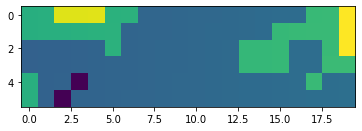

In [23]:
plt.imshow((huss[0][815:821, 415:435]))

In [149]:
tasfile = 'tasmin_hadukgrid_uk_1km_day_20191201-20191231.nc'
ds = Dataset(tasfile, mode = 'r')

for dim in ds.dimensions.values():
    print(dim)
    
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 31
<class 'netCDF4._netCDF4.Dimension'>: name = 'projection_y_coordinate', size = 1450
<class 'netCDF4._netCDF4.Dimension'>: name = 'projection_x_coordinate', size = 900
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2
<class 'netCDF4._netCDF4.Variable'>
float64 tasmin(time, projection_y_coordinate, projection_x_coordinate)
    _FillValue: 1e+20
    standard_name: air_temperature
    long_name: Minimum air temperature
    units: degC
    description: Minimum air temperature
    label_units: C
    level: 1.5m
    plot_label: Minimum air temperature at 1.5m (C)
    cell_methods: time: minimum (comment: observing period is 0900 on day D-1 to 0900 on day D)
    grid_mapping: transverse_mercator
    coordinates: latitude longitude
unlimited dimensions: 
current shape = (31, 1450, 900)
filling on
<class 'netCDF4._netCDF4.Variable'>
int32 transverse_mercator()
    grid_mapping_name: transverse_mercator
    longitude_of_p

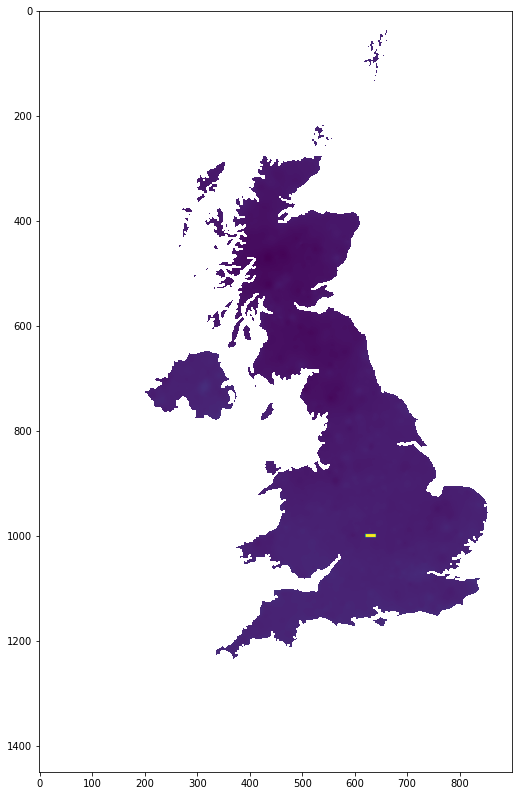

In [187]:
time = ds['time'][:]
lons = ds['projection_x_coordinate'][:]
#indexing as the data comes south-north, flipped to be north to south for sanity when plotting
lats = ds['projection_x_coordinate'][:][::-1]
tas = ds['tasmin'][:][:,::-1,:]

tas[0][997:1003, 621:641]+=100

fig = plt.figure(figsize=(28,14))
plt.imshow(tas[0])

In [176]:
for i,j in enumerate(lats):
    print(i, j)

0 699500.0
1 698500.0
2 697500.0
3 696500.0
4 695500.0
5 694500.0
6 693500.0
7 692500.0
8 691500.0
9 690500.0
10 689500.0
11 688500.0
12 687500.0
13 686500.0
14 685500.0
15 684500.0
16 683500.0
17 682500.0
18 681500.0
19 680500.0
20 679500.0
21 678500.0
22 677500.0
23 676500.0
24 675500.0
25 674500.0
26 673500.0
27 672500.0
28 671500.0
29 670500.0
30 669500.0
31 668500.0
32 667500.0
33 666500.0
34 665500.0
35 664500.0
36 663500.0
37 662500.0
38 661500.0
39 660500.0
40 659500.0
41 658500.0
42 657500.0
43 656500.0
44 655500.0
45 654500.0
46 653500.0
47 652500.0
48 651500.0
49 650500.0
50 649500.0
51 648500.0
52 647500.0
53 646500.0
54 645500.0
55 644500.0
56 643500.0
57 642500.0
58 641500.0
59 640500.0
60 639500.0
61 638500.0
62 637500.0
63 636500.0
64 635500.0
65 634500.0
66 633500.0
67 632500.0
68 631500.0
69 630500.0
70 629500.0
71 628500.0
72 627500.0
73 626500.0
74 625500.0
75 624500.0
76 623500.0
77 622500.0
78 621500.0
79 620500.0
80 619500.0
81 618500.0
82 617500.0
83 616500.0
84

754 -54500.0
755 -55500.0
756 -56500.0
757 -57500.0
758 -58500.0
759 -59500.0
760 -60500.0
761 -61500.0
762 -62500.0
763 -63500.0
764 -64500.0
765 -65500.0
766 -66500.0
767 -67500.0
768 -68500.0
769 -69500.0
770 -70500.0
771 -71500.0
772 -72500.0
773 -73500.0
774 -74500.0
775 -75500.0
776 -76500.0
777 -77500.0
778 -78500.0
779 -79500.0
780 -80500.0
781 -81500.0
782 -82500.0
783 -83500.0
784 -84500.0
785 -85500.0
786 -86500.0
787 -87500.0
788 -88500.0
789 -89500.0
790 -90500.0
791 -91500.0
792 -92500.0
793 -93500.0
794 -94500.0
795 -95500.0
796 -96500.0
797 -97500.0
798 -98500.0
799 -99500.0
800 -100500.0
801 -101500.0
802 -102500.0
803 -103500.0
804 -104500.0
805 -105500.0
806 -106500.0
807 -107500.0
808 -108500.0
809 -109500.0
810 -110500.0
811 -111500.0
812 -112500.0
813 -113500.0
814 -114500.0
815 -115500.0
816 -116500.0
817 -117500.0
818 -118500.0
819 -119500.0
820 -120500.0
821 -121500.0
822 -122500.0
823 -123500.0
824 -124500.0
825 -125500.0
826 -126500.0
827 -127500.0
828 -12850

In [177]:
for i,j in enumerate(lons):
    print(i, j)

0 -199500.0
1 -198500.0
2 -197500.0
3 -196500.0
4 -195500.0
5 -194500.0
6 -193500.0
7 -192500.0
8 -191500.0
9 -190500.0
10 -189500.0
11 -188500.0
12 -187500.0
13 -186500.0
14 -185500.0
15 -184500.0
16 -183500.0
17 -182500.0
18 -181500.0
19 -180500.0
20 -179500.0
21 -178500.0
22 -177500.0
23 -176500.0
24 -175500.0
25 -174500.0
26 -173500.0
27 -172500.0
28 -171500.0
29 -170500.0
30 -169500.0
31 -168500.0
32 -167500.0
33 -166500.0
34 -165500.0
35 -164500.0
36 -163500.0
37 -162500.0
38 -161500.0
39 -160500.0
40 -159500.0
41 -158500.0
42 -157500.0
43 -156500.0
44 -155500.0
45 -154500.0
46 -153500.0
47 -152500.0
48 -151500.0
49 -150500.0
50 -149500.0
51 -148500.0
52 -147500.0
53 -146500.0
54 -145500.0
55 -144500.0
56 -143500.0
57 -142500.0
58 -141500.0
59 -140500.0
60 -139500.0
61 -138500.0
62 -137500.0
63 -136500.0
64 -135500.0
65 -134500.0
66 -133500.0
67 -132500.0
68 -131500.0
69 -130500.0
70 -129500.0
71 -128500.0
72 -127500.0
73 -126500.0
74 -125500.0
75 -124500.0
76 -123500.0
77 -12250

In [173]:
1226- ((52.0607-50.0657)*(1226-275))/(58.6373-50.0657)

1004.6591768164641

In [174]:
((5.7132-1.6228)*(538-331)/(5.7132-3.0689))+331

651.2030026850207

In [188]:
tasfile = 'rainfall_hadukgrid_uk_1km_day_20191201-20191231.nc'
ds = Dataset(tasfile, mode = 'r')

for dim in ds.dimensions.values():
    print(dim)
    
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 31
<class 'netCDF4._netCDF4.Dimension'>: name = 'projection_y_coordinate', size = 1450
<class 'netCDF4._netCDF4.Dimension'>: name = 'projection_x_coordinate', size = 900
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2
<class 'netCDF4._netCDF4.Variable'>
float64 rainfall(time, projection_y_coordinate, projection_x_coordinate)
    _FillValue: 1e+20
    standard_name: lwe_thickness_of_precipitation_amount
    long_name: Total precipitation amount
    units: mm
    description: Total rainfall
    label_units: mm
    plot_label: Total rainfall (mm)
    cell_methods: time: sum
    grid_mapping: transverse_mercator
    coordinates: latitude longitude
unlimited dimensions: 
current shape = (31, 1450, 900)
filling on
<class 'netCDF4._netCDF4.Variable'>
int32 transverse_mercator()
    grid_mapping_name: transverse_mercator
    longitude_of_prime_meridian: 0.0
    semi_major_axis: 6377563.396
    semi_minor_axis: 6356256.90